# June 29, 2024

Some experimentation to fix various things in the display.

In [1]:
import sys
sys.path.append("..")
import lib

import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt

I've fixed the unamed column issue, but this dataframe still needs massaging.

Transposition & setting of indexes is still needed.

In [2]:
myfile = "2024-06-28_17:20:42.csv"
df = pd.read_csv(myfile)
# Still not saving right, have to drop this column
df.drop(columns="Unnamed: 0", inplace=True)
df = df.T
df.index = df.index.astype(int)

# Initial exploration

This is the default graph.

Here's a graph!


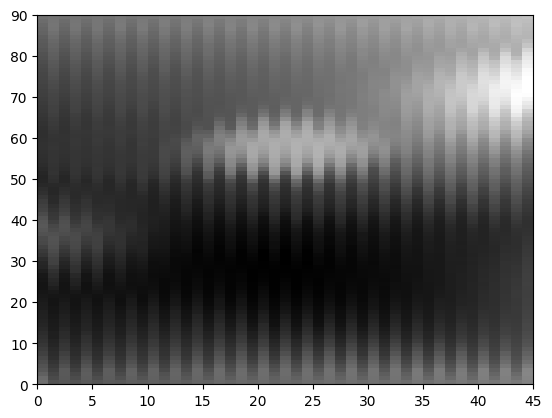

In [3]:
lib.graph(df)

Plot of max & min

<Axes: >

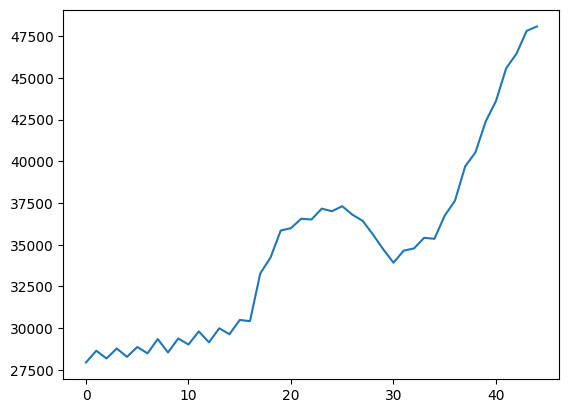

In [4]:
df.max().plot()

<Axes: >

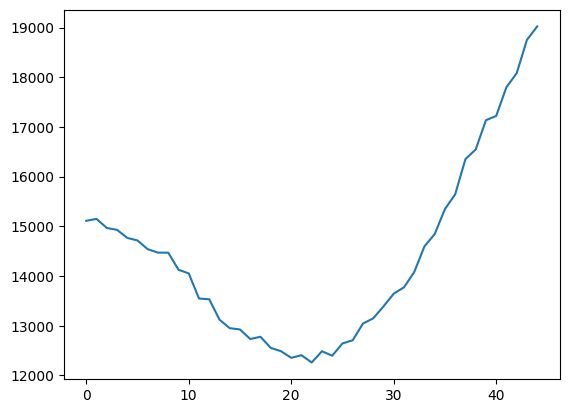

In [5]:
df.min().plot()

# Huh: gouraud shading is interesting, but different normalizations are not

Here's a graph!


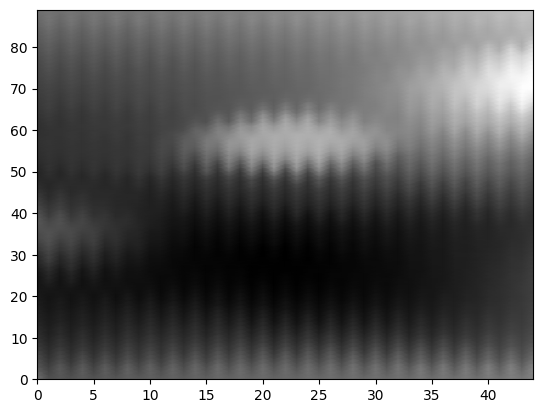

In [18]:
def shade(data: np.array, cmap: str = "gray", norm: str = "linear", shading=None):
    """
    Graph data in some way.  Args:

    data: numpy arrayff
    cmap: color map for pcolormesh

    norm: string of name of normalize for pcolormesh;
    Normalize classes not supported.

    shading: whether to apply shading
    """
    print(f"Here's a graph!")
    if shading:
        plt.pcolormesh(data, cmap=cmap, norm=norm, shading=shading)
    else:
        plt.pcolormesh(data, cmap=cmap, norm=norm)
    # plt.gca().set_aspect("equal")  # show square as square
    plt.show()

shade(df, shading="gouraud")

Here's a graph!


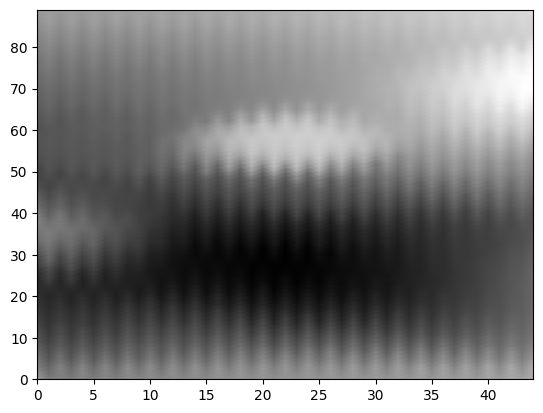

In [7]:
import matplotlib.colors as colors

shade(df, shading="gouraud", norm=colors.LogNorm(vmin=df.min().min(), vmax=df.max().max()))

Here's a graph!


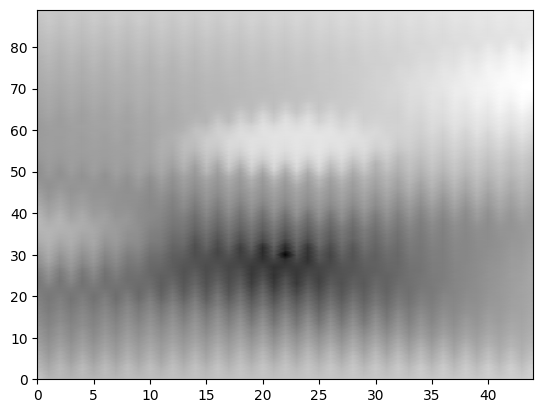

In [8]:
shade(df, shading="gouraud", norm=colors.PowerNorm(gamma=0.3))

# What can we do about the striping?

Helper function to compare stuff:

In [38]:
orig_df = df

def compare(df, title="New", orig_df=orig_df):
    """Compare plot of df vs the original
    """
    fig, (ax0, ax1) = plt.subplots(1, 2)
    fig.suptitle("Comparison")
    
    ax0.pcolormesh(orig_df, cmap="gray", norm="linear")
    ax0.set_title("Original")
    ax0.label_outer()

    ax1.pcolormesh(df, cmap="gray", norm="linear")
    ax1.set_title(title)
    ax1.label_outer()

    fig.show()

/tmp/ipykernel_424362/5426439.py:17: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


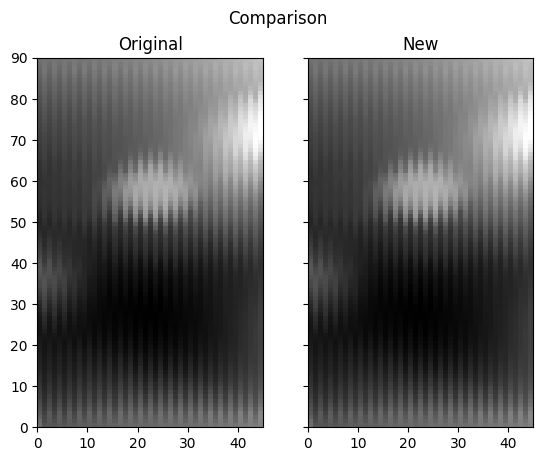

In [26]:
compare(df)

## Test of normalization, standardization and smoothing

/tmp/ipykernel_424362/1186171266.py:17: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


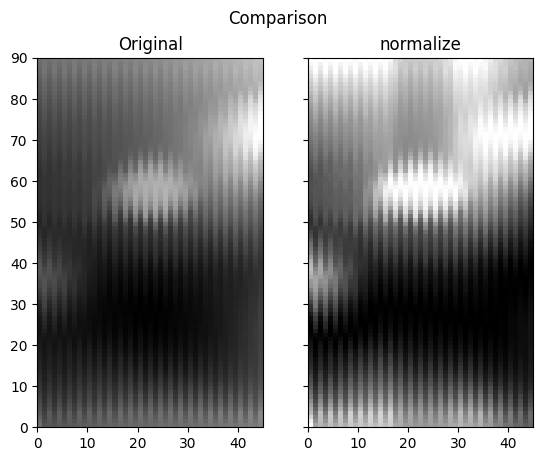

In [66]:
def normalize_dataframe(df):
    """
    Normalize each column of the DataFrame to [0, 1].
    
    Parameters:
    df : pd.DataFrame
        Input DataFrame with numerical data.
        
    Returns:
    pd.DataFrame
        Normalized DataFrame.
    """
    return (df - df.min()) / (df.max() - df.min())

compare(normalize_dataframe(df), title="normalize")

/tmp/ipykernel_424362/1186171266.py:17: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


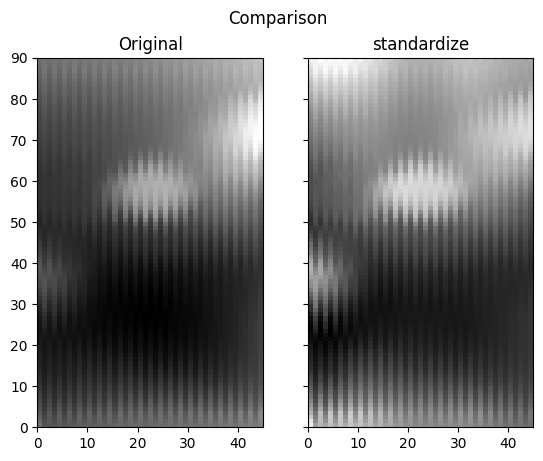

In [40]:
def standardize_dataframe(df):
    """
    Standardize each column of the DataFrame to have mean 0 and standard deviation 1.
    
    Parameters:
    df : pd.DataFrame
        Input DataFrame with numerical data.
        
    Returns:
    pd.DataFrame
        Standardized DataFrame.
    """
    return (df - df.mean()) / df.std()

compare(standardize_dataframe(df), title="standardize")

/tmp/ipykernel_424362/2633179270.py:15: FutureWarning: The 'axis' keyword in DataFrame.rolling is deprecated and will be removed in a future version. Call the method without the axis keyword instead.
  return df.rolling(window_size, min_periods=1, axis=0).mean()
/tmp/ipykernel_424362/1186171266.py:17: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


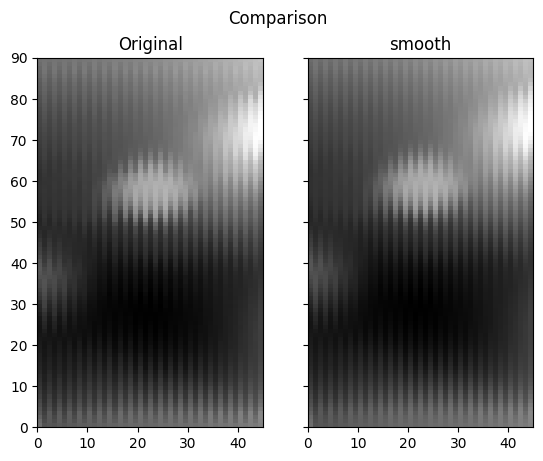

In [41]:
def smooth_dataframe(df, window_size=3):
    """
    Smooth each column of the DataFrame using a moving average filter.
    
    Parameters:
    df : pd.DataFrame
        Input DataFrame with numerical data.
    window_size : int, optional
        Size of the moving average window (default is 3).
        
    Returns:
    pd.DataFrame
        Smoothed DataFrame.
    """
    return df.rolling(window_size, min_periods=1, axis=0).mean()

compare(smooth_dataframe(df), title="smooth")

## Turns out I should be using imshow for interpolation


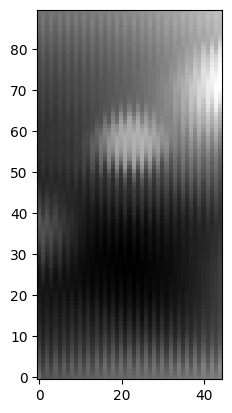

In [33]:
plt.imshow(df, cmap="gray", origin="lower")

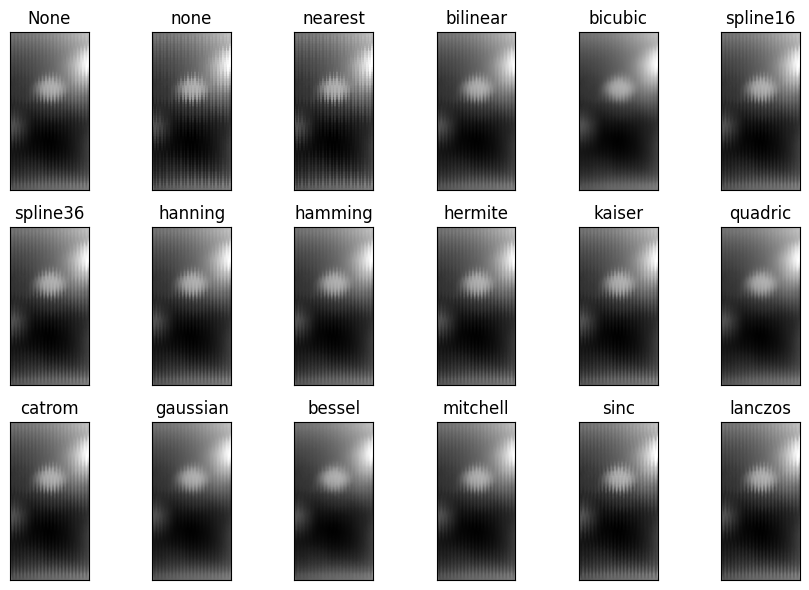

In [58]:
def test_interp(df):
    """Copied from matplotlib documentation
    """
    methods = [None, 'none', 'nearest', 'bilinear', 'bicubic', 'spline16',
               'spline36', 'hanning', 'hamming', 'hermite', 'kaiser', 'quadric',
               'catrom', 'gaussian', 'bessel', 'mitchell', 'sinc', 'lanczos']
    
    
    fig, axs = plt.subplots(nrows=3, ncols=6, figsize=(9, 6),
                            subplot_kw={'xticks': [], 'yticks': []})
    
    for ax, interp_method in zip(axs.flat, methods):
        ax.imshow(df, interpolation=interp_method, cmap='gray', origin="lower")
        ax.set_title(str(interp_method))
    
    plt.tight_layout()
    plt.show()

test_interp(df)

## Zoomed in subset

/tmp/ipykernel_424362/1186171266.py:17: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


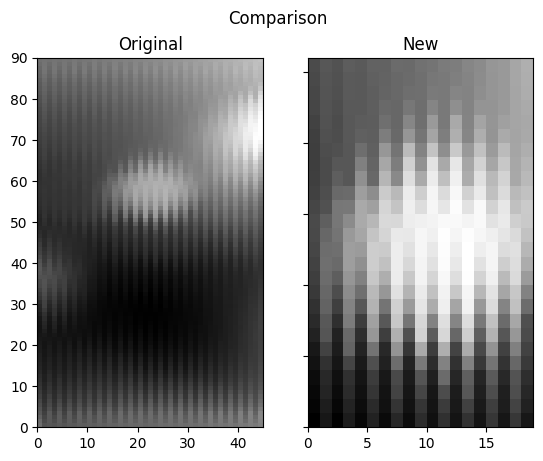

In [56]:
compare(df.loc[45:70, 12:30])

## What about just averaging by columns?

/tmp/ipykernel_424362/1186171266.py:17: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


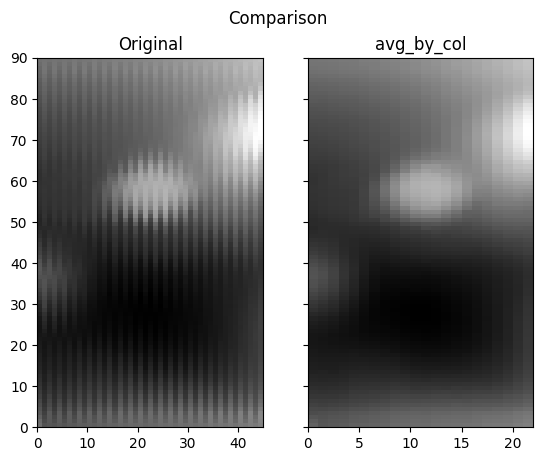

In [57]:
def avg_by_col(df) -> pd.DataFrame:
    """Calculate averages of pairs of columns
    Assuming you want to average consecutive pairs 
    (column 0 with column 1, column 2 with column 3, etc.)
    """
    num_columns = df.shape[1]
    averaged_df = pd.DataFrame()
    
    for i in range(0, num_columns, 2):
        if i + 1 < num_columns:
            averaged_column = (df.iloc[:, i] + df.iloc[:, i + 1]) / 2
            averaged_df[f'Averaged_{i}_{i+1}'] = averaged_column
    return averaged_df

compare(avg_by_col(df), "avg_by_col")

That's not bad.  The x dim is shrunk, which I don't like, but that's not terrible.

Of course, that doesn't address the question of *why* I'm getting this striping.

## What if we combine column averaging with interpolation?

In [62]:
avg_df = avg_by_col(df)
avg_df.shape

(90, 22)

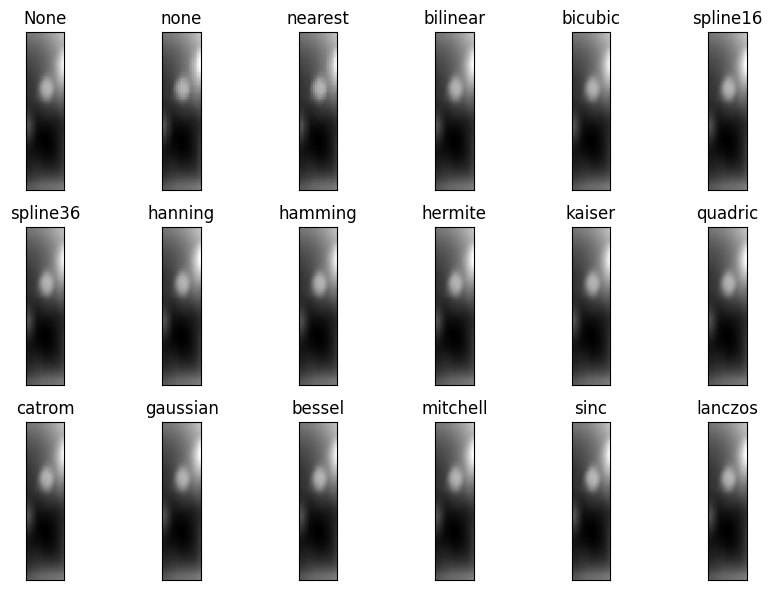

In [63]:
test_interp(avg_df)

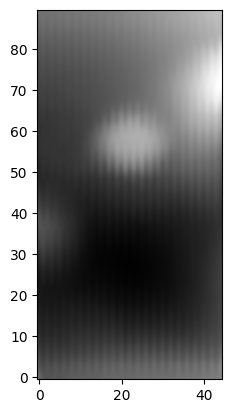

In [64]:
plt.imshow(df, interpolation="bicubic", cmap='gray', origin="lower")

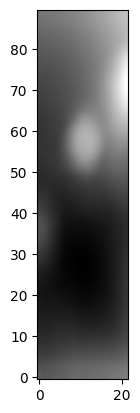

In [65]:
plt.imshow(avg_df, interpolation="bicubic", cmap='gray', origin="lower")